Author : NGALAMULUME KALONJI JONATHAN
* MAT : 898477

I. PROJECT Description
*  SUBJECT : Machine Learning Model for Speech Emotion Recognition system
* Goals : the Goal of this project is to designe a Machine learning Model that is able to predict emotion from speech.
* Type of Emotion : Valence-Arousal
* Dataset : https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio
* Steps:
         1. PRE-PROCESSING:
         _ Clean the dataset: resampling and trimming
         2. EXPLORATORY DATA NALYSIS :
         _ Feature Extraction (temporal, spectral and prosodic features)
         _ Feature Normalisation and Features Selection
         3. Model Implementation:
         _  MLP_Classifier,SVM and R_F
         4. Conclusion

In [17]:
#import Modules

!pip install --upgrade pip
!pip install --upgrade librosa
!pip install librosa resampy
!pip install --upgrade librosa
!python --version
!pip install pydub


import pandas as pd
import numpy as np
import sklearn

#librairie for exploring Files directory
import os
import gdown
from glob import glob
#librairies for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#librairies for Audio processing
from imblearn.over_sampling import RandomOverSampler
import scipy
from scipy.io.wavfile import write
from sklearn.preprocessing import StandardScaler
import audioread
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix

In [2]:
#connection to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


II. DATA INSPECTION

In [3]:
#sample data from a subset to listen
path = os.getcwd()
Dataset_path = "/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/audio_speech_actors_01-24/Actor_02"
new_path = os.path.join(path, Dataset_path)
os.chdir(new_path)
os.getcwd()
audioss = os.listdir()
ipd.Audio(audioss[0])

In [4]:
#geeting sample rate information from a sample subset of the Dataset
RawData_sample = "/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/audio_speech_actors_01-24/Actor_01"

files = os.listdir(RawData_sample)
# Iterate over each file
for file in files:
    # Checking file format
    if file.endswith('.wav'):
        file_path = os.path.join(RawData_sample, file)

        # Load the audio file and get its sample rate
        audio, sr = librosa.load(file_path, sr=None)
        # sample rate
        print(f"Sample rate of {file}: {sr}")

Sample rate of 03-01-07-01-01-02-01.wav: 48000
Sample rate of 03-01-03-01-01-02-01.wav: 48000
Sample rate of 03-01-05-01-01-02-01.wav: 48000
Sample rate of 03-01-08-01-01-01-01.wav: 48000
Sample rate of 03-01-07-01-02-01-01.wav: 48000
Sample rate of 03-01-03-01-02-02-01.wav: 48000
Sample rate of 03-01-04-01-01-01-01.wav: 48000
Sample rate of 03-01-03-02-02-02-01.wav: 48000
Sample rate of 03-01-01-01-01-02-01.wav: 48000
Sample rate of 03-01-04-01-01-02-01.wav: 48000
Sample rate of 03-01-02-02-01-01-01.wav: 48000
Sample rate of 03-01-02-01-01-01-01.wav: 48000
Sample rate of 03-01-02-02-02-02-01.wav: 48000
Sample rate of 03-01-08-02-01-02-01.wav: 48000
Sample rate of 03-01-04-02-01-01-01.wav: 48000
Sample rate of 03-01-03-02-01-02-01.wav: 48000
Sample rate of 03-01-08-02-02-02-01.wav: 48000
Sample rate of 03-01-06-01-02-02-01.wav: 48000
Sample rate of 03-01-05-01-02-02-01.wav: 48000
Sample rate of 03-01-05-01-01-01-01.wav: 48000
Sample rate of 03-01-02-02-01-02-01.wav: 48000
Sample rate o

II.1 Exploring a sample data selected

48000


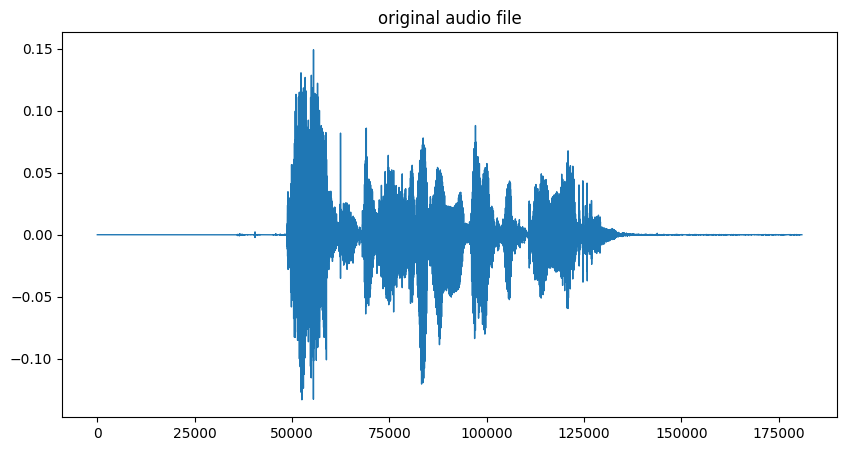

In [ ]:
y, sr =librosa.load(audioss[0], sr=None)
print(sr)
pd.Series(y).plot(figsize=(10,5),lw=1, title='original audio file')
plt.show()
ipd.Audio(y, rate=sr)

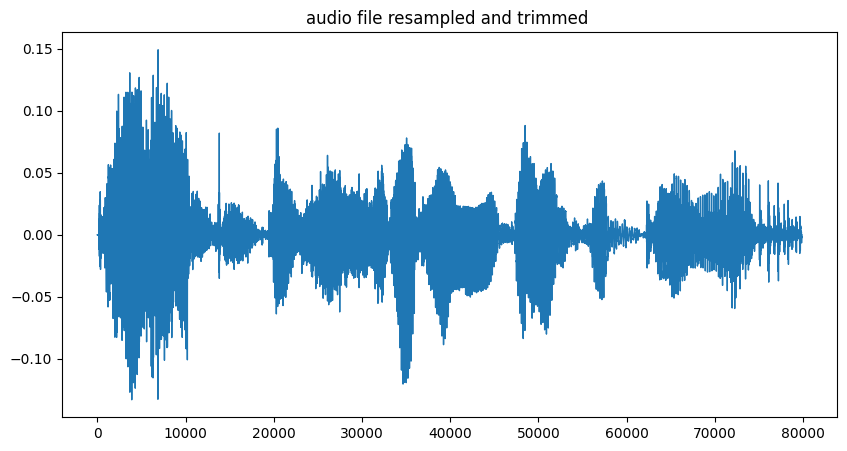

48000


In [ ]:
# Trimming the Sample Data to remmove silent frequency
trimmed_y, _ = librosa.effects.trim(y,top_db=20 )
pd.Series(trimmed_y).plot(figsize=(10,5),lw=1, title='audio file resampled and trimmed ')
plt.show()
ipd.Audio(trimmed_y, rate=sr)
print(sr)

.. SPECTOGRAM

In [ ]:
stft_Data = librosa.stft(trimmed_y)
s_db = librosa.amplitude_to_db(np.abs(stft_Data), ref=np.max)

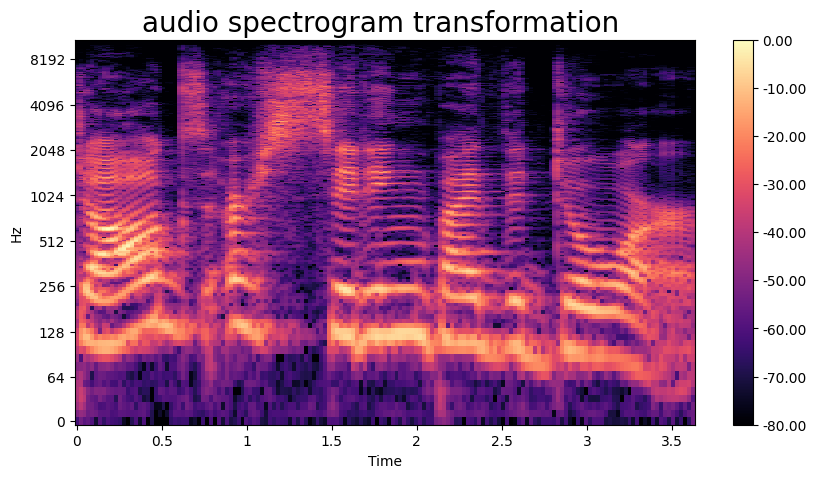

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))

img = librosa.display.specshow(s_db, x_axis="time", y_axis="log", ax=ax)
ax.set_title("audio spectrogram transformation ", fontsize=20 )

fig.colorbar(img, ax=ax, format=f"%0.2f")
plt.show()

III. DATASET CLEANING :
* Resampling
* Trimming

In [ ]:
# Function to resample audio
def resample_audio(file_path, target_sr=22050):
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)

        y_trimmed, _ = librosa.effects.trim(y, top_db=20)
        # Resample to target sample rate
        y_resampled = librosa.resample(y_trimmed, orig_sr=sr, target_sr=target_sr)

        return y_resampled, target_sr
    except Exception as e:
        print(f"Error resampling audio file {file_path}: {e}")
        return None, None

# Directory containing audio files
audio_dir = '/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/audio_speech_actors_01-24/Actor_24'

# Output directory for resampled files
output_dir = '/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_Re/Actor_24'

# Iterate over audio files
for filename in os.listdir(audio_dir):
    if filename.endswith('.wav'):  # Assuming all files are in WAV format
        file_path = os.path.join(audio_dir, filename)

        # Resample audio
        resampled_audio, target_sr = resample_audio(file_path)

        if resampled_audio is not None:
            # Save resampled audio
            output_file_path = os.path.join(output_dir, filename)
            #write(output_file_path, target_sr, resampled_audio.astype('float32'))


In [ ]:
#Exploring sample data after cleaning the Dataset
path= os.getcwd()
Dataset_path = "/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_Cleaned/Actor_01"
new_path = os.path.join(path, Dataset_path)
os.chdir(new_path)
os.getcwd()
audioss2 = os.listdir()
ipd.Audio(audioss2[0])

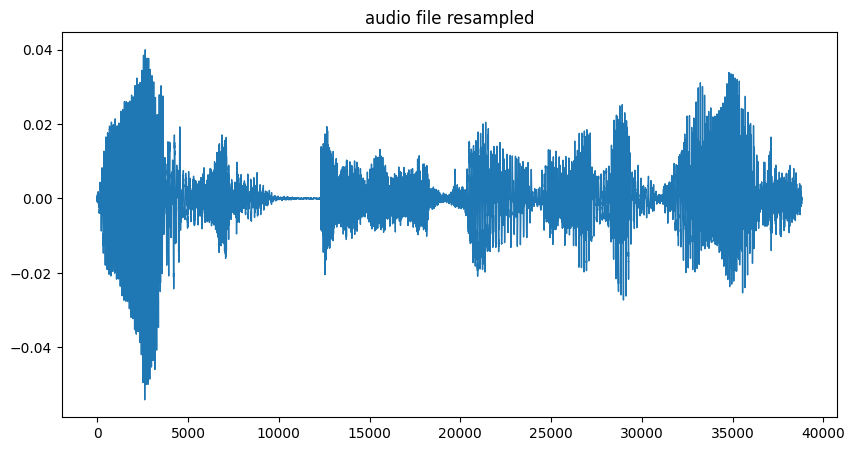

In [ ]:
y, sr =librosa.load(audioss2[0])
pd.Series(y).plot(figsize=(10,5),lw=1, title='audio file resampled')
plt.show()
ipd.Audio(y, rate=sr)


In [5]:
path3 = os.getcwd()
Dataset_path = "/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_Cleaned/"
new_path = os.path.join(path, Dataset_path)
os.chdir(new_path)
os.getcwd()
os.listdir()


['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24',
 'ravdess_labeled_dataset.csv',
 'ravdess_labeled_and_MFCC.csv',
 'Updated_dataset01.csv',
 'Updated_dataset02.csv',
 'Updated_dataset03.csv']

III.1 LABLLING THE CLEANED DATASET

In [ ]:
Dataset_Cleaned_path= '/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_Cleaned'

def label_ravdess_dataset(Dataset_path):
    data = {'file_path': [], 'emotion': []}
    emotions = {'01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad', '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'}

    for subdir, dirs, files in os.walk(Dataset_path):
        for file in files:
            file_path = os.path.join(subdir, file)

            # Check if the filename structure is as expected
            if len(file.split("-")) >= 3:
                emotion_code = file.split("-")[2]

                # Check if the emotion code is in the emotions dictionary
                if emotion_code in emotions:
                    emotion = emotions[emotion_code]
                    data['file_path'].append(file_path)
                    data['emotion'].append(emotion)
                else:
                    print(f"Warning: Unexpected emotion code '{emotion_code}' in file {file_path}")
            else:
                print(f"Warning: Unexpected filename structure in file {file_path}")

    return pd.DataFrame(data)

if __name__ == "__main__":
    # Label the dataset
    labeled_dataset = label_ravdess_dataset(Dataset_Cleaned_path )

    # Save the labeled dataset to a CSV file
    #labeled_dataset.to_csv('ravdess_labeled_dataset.csv', index=False)

    print("Dataset labeled and saved to ravdess_labeled_dataset.csv")

Dataset labeled and saved to ravdess_labeled_dataset.csv


AUDIO FILE DURATION AFTER TRIMMING  

In [ ]:
def get_audio_durations(audio_paths):
    durations = []
    for path in audio_paths:
        y, sr = librosa.load(path, sr=None)
        duration = librosa.get_duration(y=y, sr=sr)
        durations.append(duration)
    return durations

In [ ]:
labeled_dataset['duration'] = get_audio_durations(labeled_dataset['file_path'])

# Find the maximum and minimum durations
max_duration = labeled_dataset['duration'].max()
min_duration = labeled_dataset['duration'].min()

print(f'Maximum duration: {max_duration} seconds')
print(f'Minimum duration: {min_duration} seconds')

# Display the DataFrame with durations
print(labeled_dataset["duration"])

Maximum duration: 3.338684807256236 seconds
Minimum duration: 0.8 seconds
0       1.760000
1       1.653333
2       1.813333
3       1.280000
4       1.866667
          ...   
1435    1.610703
1436    2.282676
1437    2.122676
1438    1.632018
1439    1.909342
Name: duration, Length: 1440, dtype: float64


In [ ]:
os.getcwd()
os.listdir()
dataSet_Labled= '/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_Cleaned/ravdess_labeled_dataset.csv'
dataSetviwe = pd.read_csv(dataSet_Labled)
dataSetviwe.head(10)

,file_path,emotion
0,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,angry
1,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,neutral
2,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,sad
3,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,fearful
4,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,surprised
5,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,sad
6,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,neutral
7,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,happy
8,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,calm
9,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,surprised


III.2 FEATURES EXTRACTION

* MFCC

In [ ]:
def extract_features(file_path, n_mfcc=13):
    try:
        # audio file
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')

        # Extract MFCC features
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)

        # Calculate the mean of MFCCs along each feature
        mfccs_mean = np.mean(mfccs, axis=1)

        return mfccs_mean
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None
#feauture extraction
labeled_dataset['MFCC'] = labeled_dataset['file_path'].apply(lambda x: extract_features(x))
#labeled_dataset.to_csv('ravdess_labeled_and_MFCC.csv', index=False)

In [ ]:
mfccview= '/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_Cleaned/ravdess_labeled_and_MFCC.csv'
mfccextracted=pd.read_csv(mfccview)
mfccextracted.head(10)

,file_path,emotion,MFCC
0,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,angry,[-365.98404 76.688286 -28.783129 6.5...
1,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,neutral,[-420.72687 89.74704 -32.82646 6.0587...
2,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,sad,[-472.91837 82.42617 -12.676185 8.2954...
3,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,fearful,[-330.81757 33.134384 -56.663475 -8.1...
4,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,surprised,[-340.05838 62.165512 -32.42751 9.4...
5,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,sad,[-478.65005 86.020744 -20.196136 5.1...
6,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,neutral,[-449.21872 95.431946 -35.985226 16.9...
7,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,happy,[-401.48846 93.269226 -52.336212 20.1654...
8,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,calm,[-489.2299 96.51677 -19.092196 14.6...
9,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,surprised,[-351.3353 76.74508 -33.615322 10.0473...


SPECTRAL FEATURES AND TEMPORAL FEATURE:
* Spectral centroid
* zero crossing rate

In [ ]:
def extract_features(file_path):
    try:
        # audio file
        audio, sample_rate = librosa.load(file_path, sr=None, res_type='kaiser_fast')

        # Spectral features
        spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sample_rate)
        spectral_centroid_mean = np.mean(spectral_centroid)

        # Temporal features
        zero_crossing_rate = librosa.feature.zero_crossing_rate(y=audio)
        zero_crossing_rate_mean = np.mean(zero_crossing_rate)

        return spectral_centroid_mean, zero_crossing_rate_mean
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

# Load your labeled dataset
labeled_dataset = pd.read_csv('/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_Cleaned/ravdess_labeled_and_MFCC.csv')

#we Add new columns for each feature
labeled_dataset['Spectral_Centroid'] = np.nan
labeled_dataset['Zero_Crossing_Rate'] = np.nan

# we Iterate over each row for extraction
for index, row in labeled_dataset.iterrows():
    features = extract_features(row['file_path'])
    if features is not None:
        labeled_dataset.at[index, 'Spectral_Centroid'] = features[0]
        labeled_dataset.at[index, 'Zero_Crossing_Rate'] = features[1]

# Save the updated dataset to CSV
#labeled_dataset.to_csv('Updated_dataset01.csv', index=False)

In [ ]:
dtpath='/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_Cleaned/Updated_dataset01.csv'
dtt= pd.read_csv(dtpath)
dtt.head(10)

PROSODIC FATURES AND OTHER TEMPORAL FEATURES
* Intensity
* Duration
* Speech Rate
* Pause
* Pitch (FO)


In [ ]:
def extract_features(file_path):
    try:
        # audio file
        audio, sample_rate = librosa.load(file_path, sr=None, res_type='kaiser_fast')


        # intensity
        rms = librosa.feature.rms(y=audio)
        intensity_mean = np.mean(rms)
        #speech rate
        durations = np.diff(librosa.onset.onset_detect(y=audio, sr=sample_rate))
        speech_rate = len(durations) / np.sum(durations) if len(durations) > 0 else np.nan

        # duration and pause
        duration = librosa.get_duration(y=audio, sr=sample_rate)
        pause = np.mean(np.diff(np.where(audio > np.max(audio) * 0.1))) / sample_rate

        # pitch (F0)
        pitches, magnitudes = librosa.piptrack(y=audio, sr=sample_rate)
        mean_pitch = np.mean(pitches[pitches > 0])

        return intensity_mean,speech_rate,duration,pause,mean_pitch
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

# Load your labeled dataset
labeled_dataset01 = pd.read_csv('/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_Cleaned/Updated_dataset01.csv')

# new columns for each feature

labeled_dataset01['Intensity'] = np.nan
labeled_dataset01['Speech_Rate'] = np.nan
labeled_dataset01['Duration'] = np.nan
labeled_dataset01['Pause'] = np.nan
labeled_dataset01['Pitch (FO)'] = np.nan

# now we Iterate over each row and extract features
for index, row in labeled_dataset.iterrows():
    features = extract_features(row['file_path'])
    if features is not None:

        labeled_dataset01.at[index, 'Intensity'] = features[0]
        labeled_dataset01.at[index, 'Speech_Rate'] = features[1]
        labeled_dataset01.at[index, 'Duration'] = features[2]
        labeled_dataset01.at[index, 'Pause'] = features[3]
        labeled_dataset01.at[index, 'Pitch (FO)'] = features[4]

#And we Save the updated dataset to CSV
#labeled_dataset01.to_csv('Updated_dataset02.csv', index=False)

In [ ]:
Up02= '/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_Cleaned/Updated_dataset02.csv'
Upfor2= pd.read_csv(Up02)
Upfor2.head(10)

* Spectral Bandwdith

In [ ]:
def extract_features(file_path):
    try:
        # audio file
        audio, sample_rate = librosa.load(file_path, sr=None, res_type='kaiser_fast')

        #spectral bandwidth
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sample_rate)
        spectral_b_reshaped= spectral_bandwidth.reshape(-1, 1)

        return spectral_b_reshaped
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

# Load your labeled dataset
labeled_dataset01 = pd.read_csv('/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_Cleaned/Updated_dataset02.csv')

# As on previeus extraction we add a new columns for spectral Bandwidth feature
labeled_dataset01['spectral_bandwidth'] = np.nan

# and we Iterate over each row for ectraction
for index, row in labeled_dataset.iterrows():
    features = extract_features(row['file_path'])
    if features is not None:

        labeled_dataset01.at[index, 'spectral_bandwidth'] = features[0]

# then we Save the updated dataset to CSV
#labeled_dataset01.to_csv('Updated_dataset03.csv', index=False)

In [ ]:
UP03 ='/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_Cleaned/Updated_dataset03.csv'
Upfor3= pd.read_csv(UP03)
Upfor3.head(5)

DATASET VISUALIZATION AFTER FEATURE EXTRACTION

In [6]:
#MFCC normalisation
def parse_mfcc_string(mfcc_string):
    mfcc_values = mfcc_string.replace('[', '').replace(']', '').split()
    mfcc_floats = [float(value) for value in mfcc_values]
    return mfcc_floats
#path to dataset with features
dataset_with_features= '/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_Cleaned/Updated_dataset03.csv'
dataset4=pd.read_csv(dataset_with_features)
dataset4['MFCC']= dataset4['MFCC'].apply(parse_mfcc_string)
dataset4.head(5)

,file_path,emotion,MFCC,Spectral_Centroid,Zero_Crossing_Rate,Intensity,Speech_Rate,Duration,Pause,Pitch (FO),spectral_bandwidth
0,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,angry,"[-365.98404, 76.688286, -28.783129, 6.529943, ...",2597.328554,0.151876,0.018207,0.129032,1.664036,0.000267,1351.129517,2832.478580
1,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,neutral,"[-420.72687, 89.74704, -32.82646, 6.058738, -1...",2245.909284,0.130615,0.012387,0.172414,1.578685,0.000316,1140.065918,2472.038460
2,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,sad,"[-472.91837, 82.42617, -12.676185, 8.295455, -...",2406.632620,0.142391,0.007101,0.147541,1.557370,0.000279,1202.786255,2291.032201
3,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,fearful,"[-330.81757, 33.134384, -56.663475, -8.103263,...",2405.947469,0.120253,0.042520,0.192308,1.408027,0.000226,1777.074829,2070.790963
4,/content/drive/MyDrive/SER_PROJECT_AHIS/Datase...,surprised,"[-340.05838, 62.165512, -32.42751, 9.438294, -...",2725.176015,0.156992,0.019524,0.125000,1.674694,0.000268,1873.027832,2495.253109


IV. EXPLORATION DATA ANNALYSIS (EDA)

In [7]:

Final_dataset = pd.read_csv('//content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_Cleaned/Updated_dataset03.csv')
#shape of the dataset
print("\nDataset Shape:")
print(Final_dataset.shape)

# Summary statistics of the dataset
print("\nSummary Statistics:")
print(Final_dataset.describe())
#getting a median over all feature
features = dataset4[['MFCC', 'Spectral_Centroid', 'Zero_Crossing_Rate',  'Intensity', 'Speech_Rate','Pitch (FO)', 'Duration','Pause', 'spectral_bandwidth']]

median = np.median(dataset4['Zero_Crossing_Rate'])
print("median", median)


Dataset Shape:
(1440, 11)

Summary Statistics:
       Spectral_Centroid  Zero_Crossing_Rate    Intensity  Speech_Rate  \
count        1440.000000         1440.000000  1440.000000  1440.000000   
mean         2330.250678            0.121896     0.022981     0.142079   
std           385.827587            0.034735     0.027574     0.028931   
min          1243.306509            0.043965     0.000739     0.060000   
25%          2054.102090            0.096786     0.006475     0.121622   
50%          2315.786238            0.117866     0.012646     0.142857   
75%          2584.832934            0.143428     0.026171     0.162791   
max          3645.909261            0.332056     0.178318     0.232558   

          Duration        Pause   Pitch (FO)  spectral_bandwidth  
count  1440.000000  1440.000000  1440.000000         1440.000000  
mean      1.670375     0.000266  1371.930349         2536.850666  
std       0.352485     0.000099   268.949600          371.314633  
min       0.80000

IV.1 DATA DISTRIBUTION

Class frequencies:
emotion
angry        192
sad          192
fearful      192
surprised    192
calm         192
happy        192
disgust      192
neutral       96
Name: count, dtype: int64


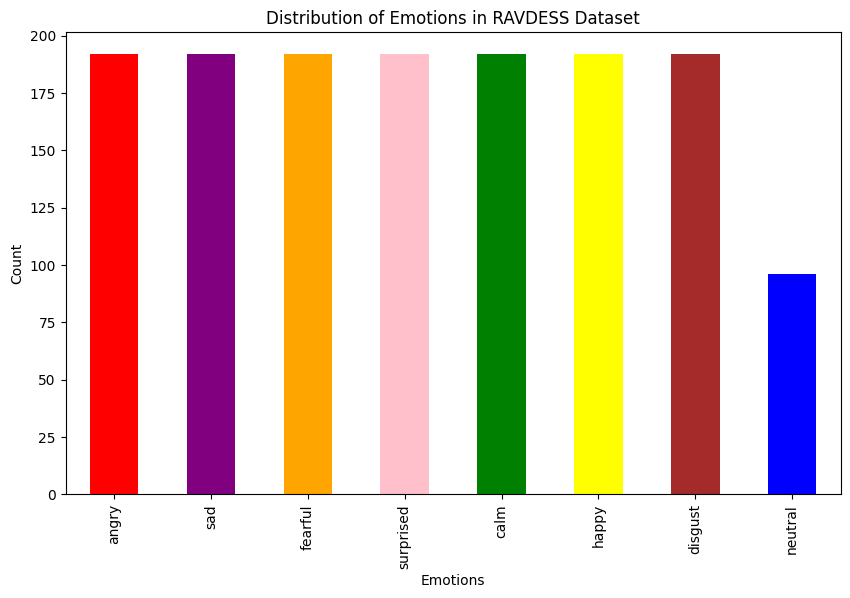

In [10]:
# Visualize the distribution of emotions

emotion_counts = dataset4['emotion'].value_counts()
emotion_colors = {
    'neutral': 'blue',
    'calm': 'green',
    'happy': 'yellow',
    'sad': 'purple',
    'angry': 'red',
    'fearful': 'orange',
    'disgust': 'brown',
    'surprised': 'pink'
}
# Calculate class frequencies
class_frequencies = dataset4['emotion'].value_counts()

# Print class frequencies
print("Class frequencies:")
print(class_frequencies)

# Plot the distribution
plt.figure(figsize=(10, 6))
#emotion_counts.plot(kind='bar', color='skyblue')
emotion_counts.plot(kind='bar', color=[emotion_colors[emotion] for emotion in emotion_counts.index])
plt.title('Distribution of Emotions in RAVDESS Dataset')
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.show()

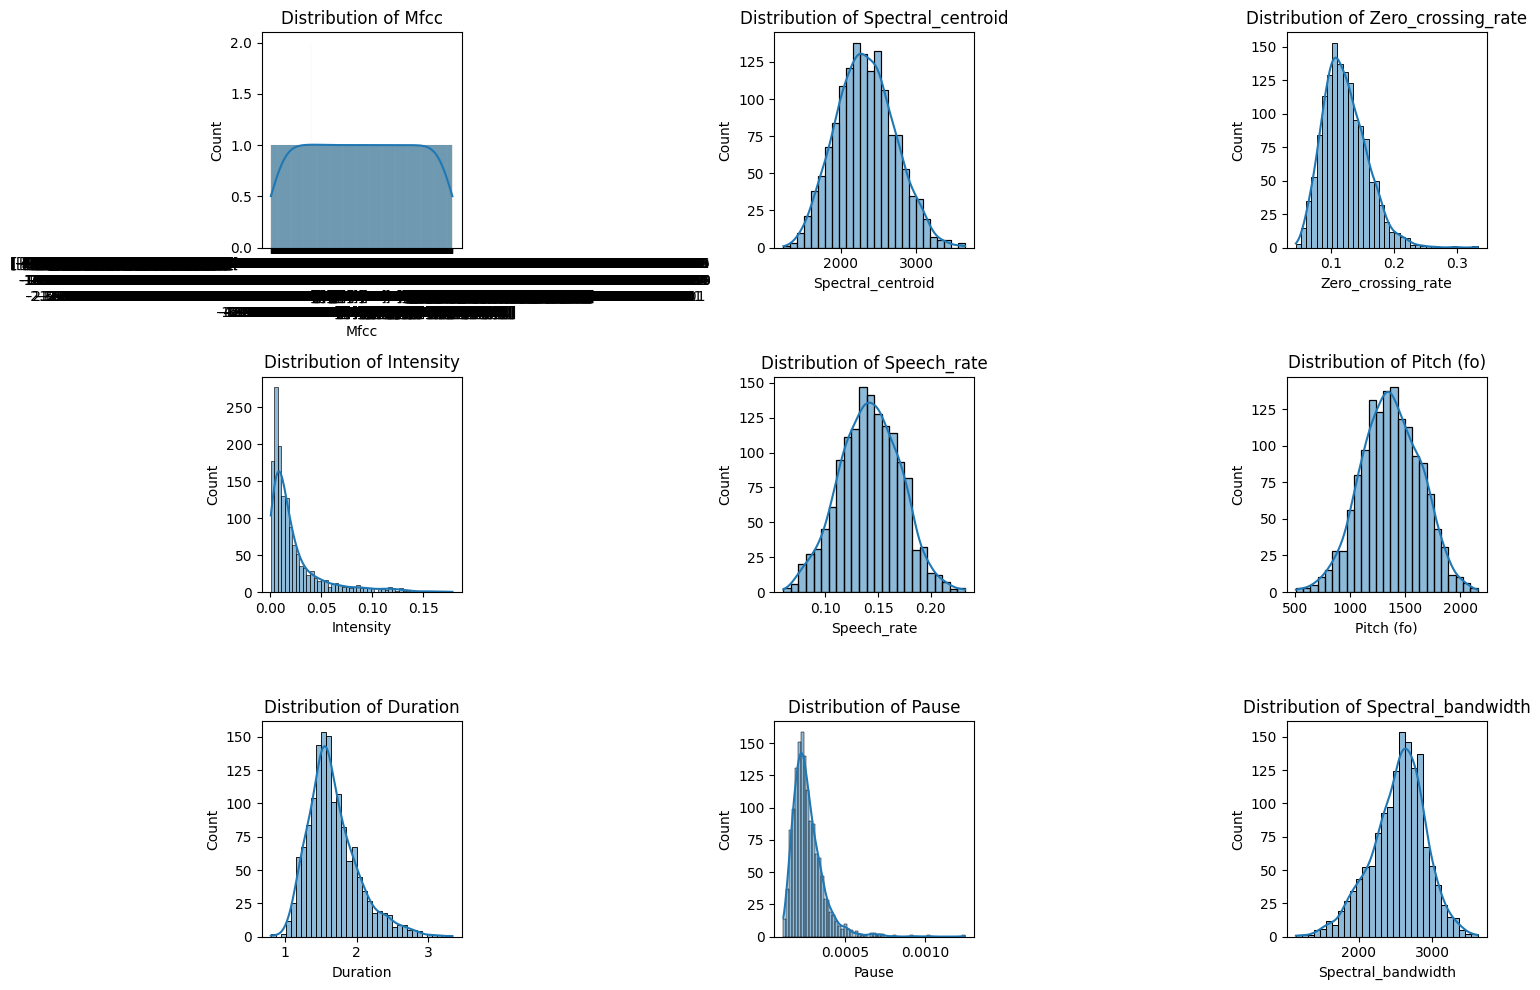

In [11]:
# Fearures  distribution
features = dataset4[['MFCC', 'Spectral_Centroid', 'Zero_Crossing_Rate',  'Intensity', 'Speech_Rate','Pitch (FO)', 'Duration','Pause', 'spectral_bandwidth']]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=Final_dataset, x=feature, kde=True)
    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [17]:
#data1 = pd.read_csv("/content/drive/MyDrive/SER_PROJECT_AHIS/Dataset/Dataset_trimed/Updated_dataset102.csv")
#data1.head(10)

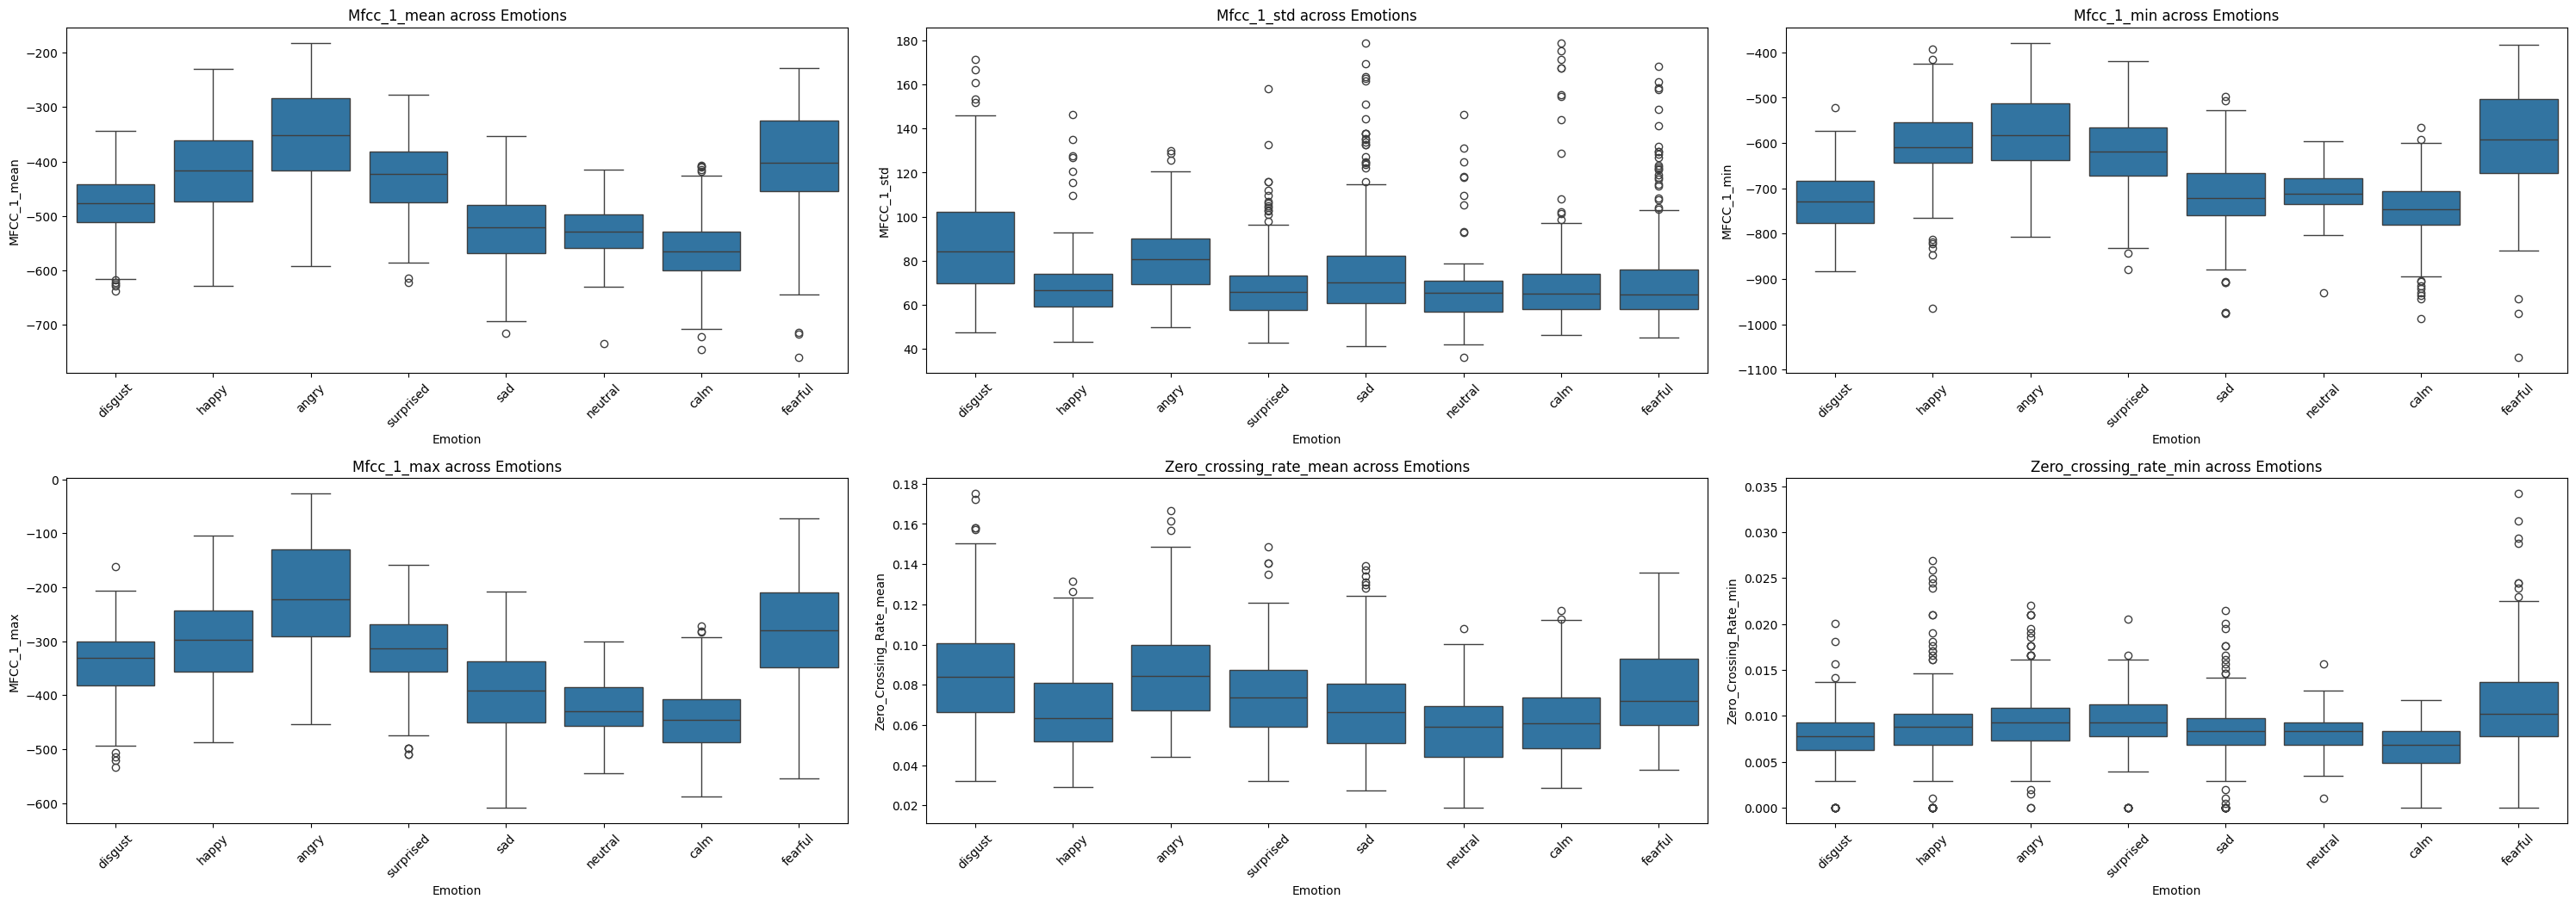

In [16]:
features = data1[['MFCC_1_mean','MFCC_1_std','MFCC_1_min','MFCC_1_max','Zero_Crossing_Rate_mean','Zero_Crossing_Rate_min']]
plt.figure(figsize=(30, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data1, x='emotion', y=feature)
    plt.title(f'{feature.capitalize()} across Emotions')
    plt.xlabel('Emotion')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

V. FEATURE SELECTION AND NORMALISATION

In [18]:

#features selection
MFCC= np.array(dataset4['MFCC'].tolist())
spect_cent = np.array(dataset4['Spectral_Centroid'])
zero_cross_R = np.array(dataset4['Zero_Crossing_Rate'])
Intensity = np.array(dataset4['Intensity'])
Speech_Rate = np.array(dataset4['Speech_Rate'])
Duration = np.array(dataset4['Duration'])
Pause =np.array(dataset4['Pause'])
Pitch= np.array(dataset4['Pitch (FO)'])
spectral_bandwidth = np.array(dataset4['spectral_bandwidth'])


#reshaping 1D feature to 2D feature for concatenate them
spect_cent_reshaped = spect_cent.reshape(-1, 1)
zero_cross_R_reshaped = zero_cross_R.reshape(-1, 1)
Intensity_reshaped = Intensity.reshape(-1, 1)
Speech_Rate_reshaped = Speech_Rate.reshape(-1, 1)
Duration_reshaped = Duration.reshape(-1, 1)
Pause_reshaped = Pause.reshape(-1, 1)
Pitch_reshaped = Pitch.reshape(-1, 1)
spectral_bandwidth_reshaped = spectral_bandwidth.reshape(-1, 1)

print(MFCC.shape,spect_cent_reshaped.shape,zero_cross_R_reshaped.shape,Intensity_reshaped.shape,Duration_reshaped.shape,Pause_reshaped.shape,Pitch_reshaped.shape)
#features combinaison
Features2 = np.concatenate((MFCC, Intensity_reshaped, Duration_reshaped, Pause_reshaped, Pitch_reshaped, zero_cross_R_reshaped), axis=1)

Target_Var = dataset4['emotion']

x = Features2
y = Target_Var
# training and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# Features normalisation : Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(1440, 13) (1440, 1) (1440, 1) (1440, 1) (1440, 1) (1440, 1) (1440, 1)


VI. MODEL DESINING : Artifial Neural NetWork: MLP_Classifier

Neural Network Accuracy: 0.71
Neural Network Classification Report : 
              precision    recall  f1-score   support

       angry       0.86      0.86      0.86        36
        calm       0.79      0.83      0.81        41
     disgust       0.68      0.65      0.67        43
     fearful       0.67      0.73      0.70        33
       happy       0.72      0.61      0.66        38
     neutral       0.58      0.70      0.64        20
         sad       0.60      0.59      0.59        41
   surprised       0.72      0.72      0.72        36

    accuracy                           0.71       288
   macro avg       0.70      0.71      0.71       288
weighted avg       0.71      0.71      0.71       288



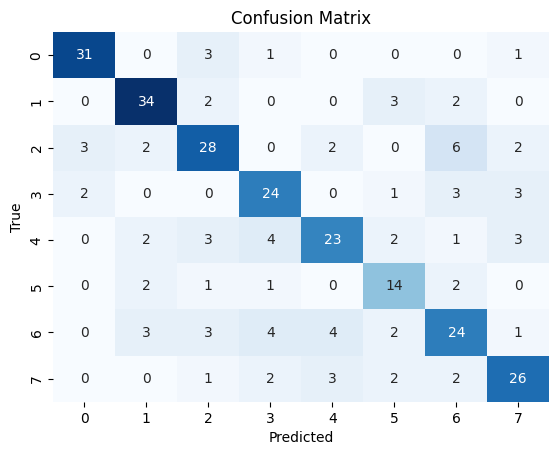

In [19]:
#Traning classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)
# predictions
y_pred = mlp_classifier.predict(X_test_scaled)

# metrics Evaluate the classifier by Accuracy and Classification Report
conf_matrix = confusion_matrix(y_test, y_pred)
mlp_accuracy = mlp_classifier.score(X_test_scaled, y_test)
#Classsification_Report = classification_report(y_test, y_pred)
print(f'Neural Network Accuracy: {mlp_accuracy:.2f}')
print("Neural Network Classification Report : ")
print(classification_report(y_test, y_pred))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

MODEL DESINING : Supper Vector Machine SVM

Accuracy: 0.55
Classification_raeport: 
              precision    recall  f1-score   support

       angry       0.56      0.74      0.63        27
        calm       0.90      0.55      0.69        67
     disgust       0.72      0.58      0.65        53
     fearful       0.39      0.41      0.40        32
       happy       0.39      0.56      0.46        27
     neutral       0.15      0.25      0.19        12
         sad       0.44      0.62      0.51        29
   surprised       0.61      0.54      0.57        41

    accuracy                           0.55       288
   macro avg       0.52      0.53      0.51       288
weighted avg       0.61      0.55      0.57       288



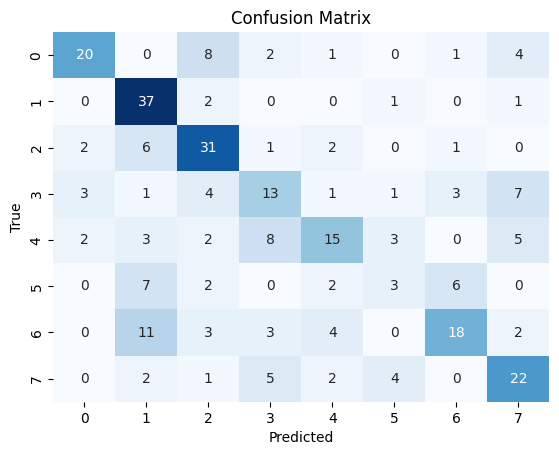

In [20]:
# Train a SVM classifier
classifier = SVC(kernel='rbf')
classifier.fit(X_train_scaled, y_train)

#clasifier evaluation
y_pred = classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_pred,y_test)
Classification_Report = classification_report(y_pred, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Classification_raeport: ')
print(f'{Classification_Report}')
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

MODEL DESING : RENDOM FOREST

Random Forest Accuracy: 0.59
Classification_raeport: 
              precision    recall  f1-score   support

       angry       0.56      0.74      0.63        27
        calm       0.90      0.55      0.69        67
     disgust       0.72      0.58      0.65        53
     fearful       0.39      0.41      0.40        32
       happy       0.39      0.56      0.46        27
     neutral       0.15      0.25      0.19        12
         sad       0.44      0.62      0.51        29
   surprised       0.61      0.54      0.57        41

    accuracy                           0.55       288
   macro avg       0.52      0.53      0.51       288
weighted avg       0.61      0.55      0.57       288



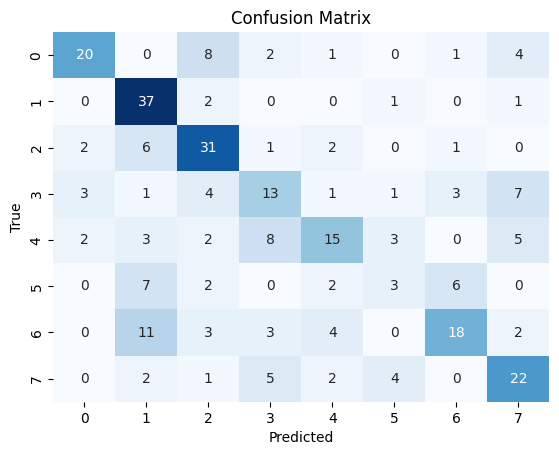

In [21]:
# train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Evaluate the classifier
rf_accuracy = rf_classifier.score(X_test_scaled, y_test)
Classification_Report = classification_report(y_pred, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(f'Classification_raeport: ')
print(f'{Classification_Report}')
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

VI. 1 RESULT INTERPRETATION:
-  Metrics used :  Accuracy, Confusion_Matrix, and Classificaton_Report.
- ACCURACY : Accuracy is a commonly used metric that measures the overall correctness of the classifier. It is calculated as the ratio of correct predictions to the total number of predictions (accuracy = (TP + TN) / (TP + TN + FP + FN)).
- CONFUSION MATRIX : the confusion matrix represent the counts of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). These values are based on the performance of the classification model,

True Positives (TP):
The number of instances that are actually positive and are correctly predicted as positive by the classifier.
True Negatives (TN):
The number of instances that are actually negative and are correctly predicted as negative by the classifier.
False Positives (FP):
The number of instances that are actually negative but are incorrectly predicted as positive by the classifier.
False Negatives (FN):

The number of instances that are actually positive but are incorrectly predicted as negative by the classifier.
-  CLASSIFICATION REPORT :

- The classification report provides additional metrics such as precision, recall, and F1-score for each class, as well as the overall accuracy.
- Metrics included in the classification report:
Precision: The proportion of true positive predictions among all positive predictions (precision = TP / (TP + FP)).
- Recall (Sensitivity or True Positive Rate): The proportion of actual positives that were correctly predicted (recall = TP / (TP + FN)).
- F1-score: The harmonic mean of precision and recall, providing a balance between the two metrics (F1-score = 2 * (precision * recall) / (precision + recall)).
- Support: The number of occurrences of each class in the true response.

VII. CONLUCSION :
* the Goals of this project was about to design a machine learning model for speech emotion recognition task. so after a while of annalysis and implementation, we have got a satisfied result by designing 3 machine learnig models and evaluate them in other to select the most performant that can be use for advanced humain interfaces system.
* we have designed  a super vector machine model, random forest mdoel and neural network model(MLP Classifier)
* up to the result comparaison, the Neural NetWork has performed the best classification compared to others, so it can  be use for an Advanced Humain interface system like real-time  speech emotion recognitioin.